<a href="https://colab.research.google.com/github/HenrySomeCode/Iris-classification-using-naive-bayes-decision-tree-random-forest-knn-svm/blob/main/Iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ref:
*   AI/ML/DL Course by Master Tuan Linh and TA - HUST
*   https://www.kaggle.com/code/thuntrnb/b-i-th-c-h-nh-4 



# Steps to buid a ML model:

##1. Determine problem:
*   What is the pratical significance of the problem ? 

    In this case, I suppose that this is just for learning the classification problem. The project has no or less meaning in terms of practical significance.

##2 Collect & analyze the data:

*   Collect the data
*   Analyze the data:
  *   What's the feature ? Sepal length,	sepal width, petal length, petal width.
  *   Visualization: to understand the story behind the data, more specifically, correlation between the data, e.g hitmap
  *   Preprocessing: considering remove linearly depent features. Remove outliers, e.g PCA, Standard scaler. Adding conditions, assumptions to the ML model that are drawn from visualization. 
      
      Also, this helps in working with non-tech departments in terms of conveying the meaning of data.
  *   Split data into train, valid, test dataset (mostly in supervised learning)











In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns

In [ ]:
data_path = '/content/drive/MyDrive/AI_ML_DL Course_by_Master_Linh_HUST/week1/Teaching Assistant/week1/data/iris.csv'

In [ ]:
data = pd.read_csv(data_path)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Visualization

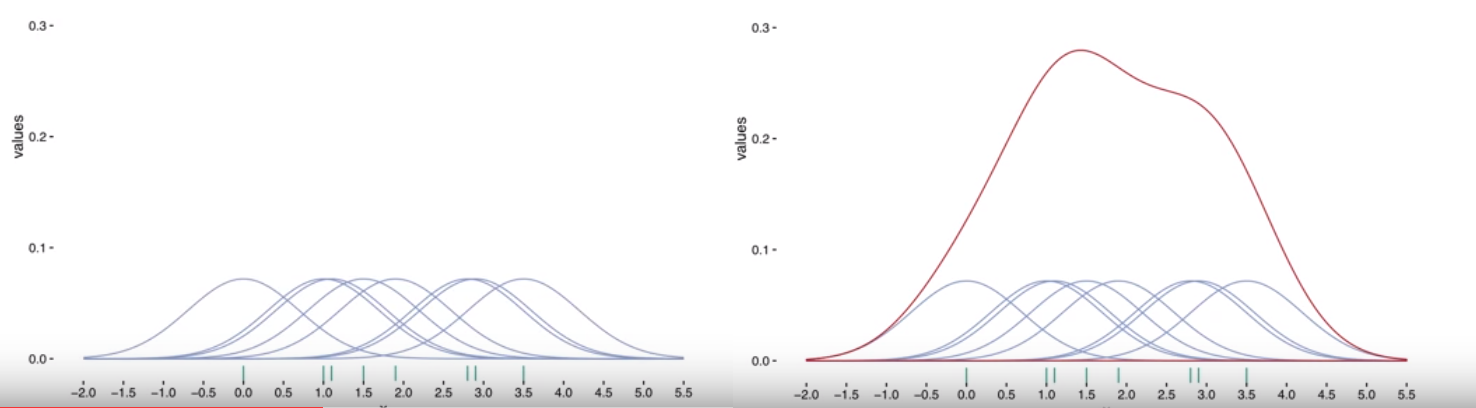

Image for explaining KDE, source: [here](https://phamdinhkhanh.github.io/2019/09/16/VisualizationPython.html#21-density-plot) 

Text(0.5, 1.0, 'Boxplot for SepalLengthCm')

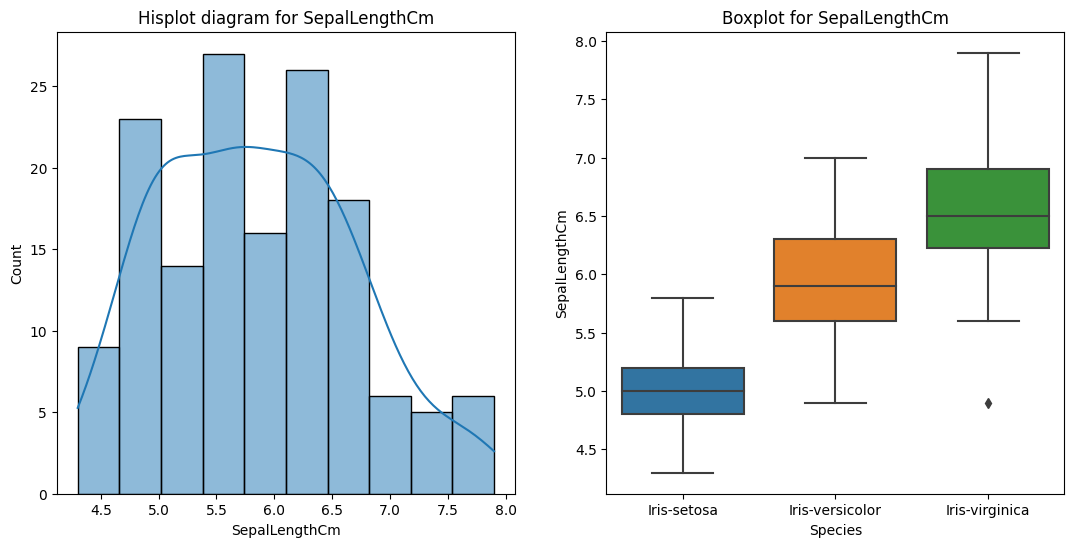

In [ ]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
# bins = 10 => 10 columns, kde = True => smooth line : Kernel Density Estimation
sns.histplot(data.SepalLengthCm, bins = 10, kde = True)
plt.title('Hisplot diagram for SepalLengthCm')

plt.subplot(1,2,2)
sns.boxplot(x="Species", y="SepalLengthCm", data=data)
plt.title('Boxplot for SepalLengthCm')

Text(0.5, 1.0, 'Boxplot for SepalWidthCm')

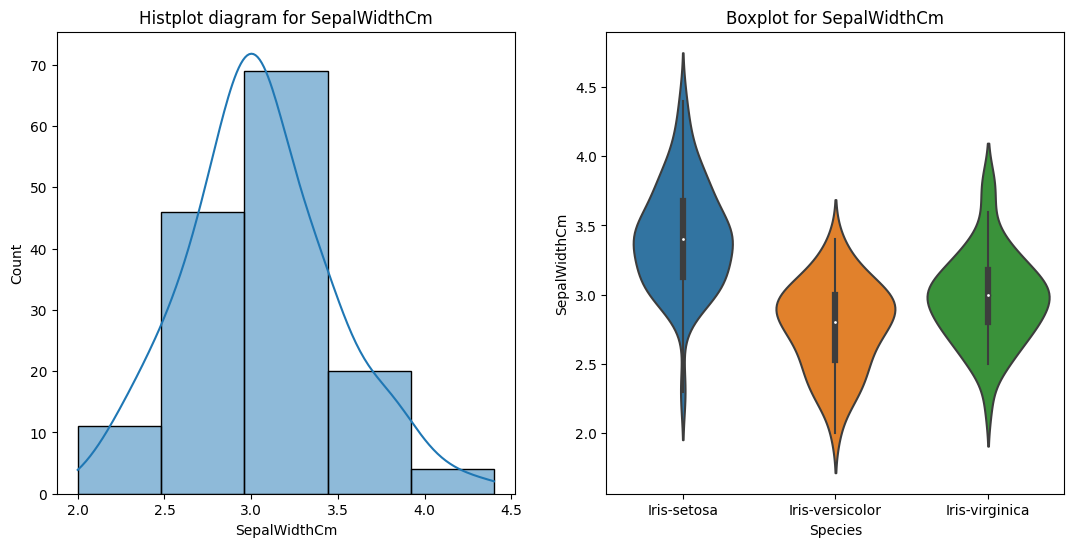

In [ ]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(data.SepalWidthCm, bins=5, kde=True)
plt.title('Histplot diagram for SepalWidthCm')
plt.subplot(1,2,2)
sns.violinplot(x="Species", y="SepalWidthCm", data=data, size=6)
plt.title('Boxplot for SepalWidthCm')

Text(0.5, 1, 'Relationship between SepalWidthCm and SepalLengthCm')

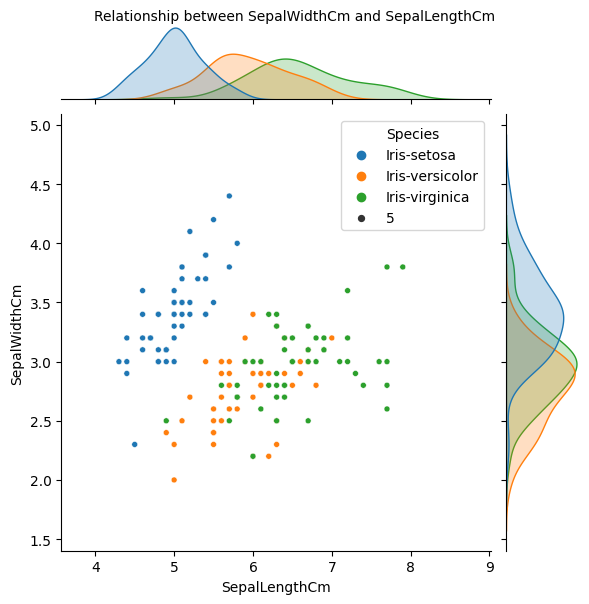

In [ ]:
p = sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=data, size=5, hue="Species")
p.fig.suptitle("Relationship between SepalWidthCm and SepalLengthCm",x=0.5, y = 1, fontsize = 10 )

Text(0.5, 1.0, 'Regression between SepalLengthCm and SepalWidthCm')

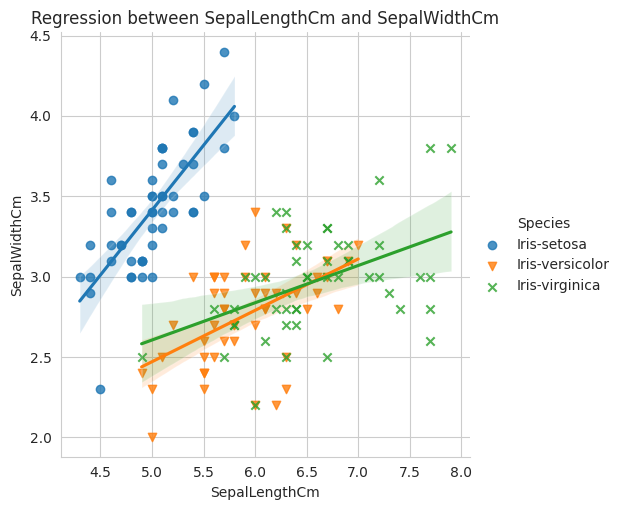

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', data=data, hue="Species", markers=['o', 'v', 'x'])
plt.title('Regression between SepalLengthCm and SepalWidthCm')

Text(0.5, 1, 'Relationship between PetalWidthCm and PetalLengthCm')

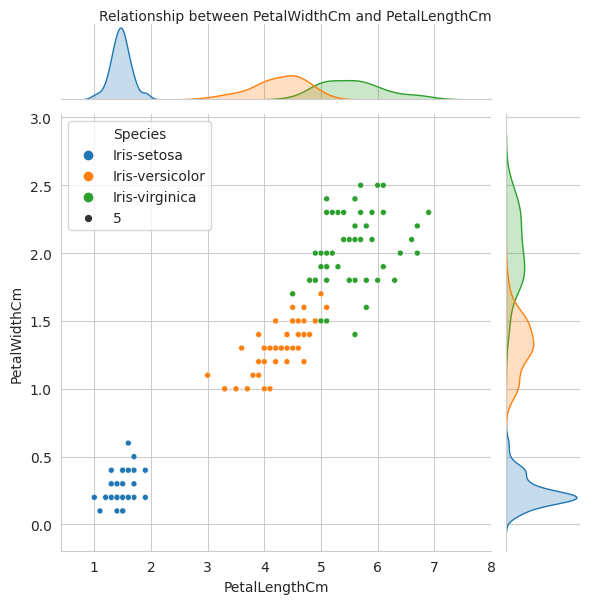

In [ ]:
p = sns.jointplot(x="PetalLengthCm", y="PetalWidthCm", data=data, size=5, hue="Species")
p.fig.suptitle("Relationship between PetalWidthCm and PetalLengthCm",x=0.5, y = 1, fontsize = 10 )

Text(0.5, 1.0, 'Regression between PetalLengthCm and PetalWidthCm')

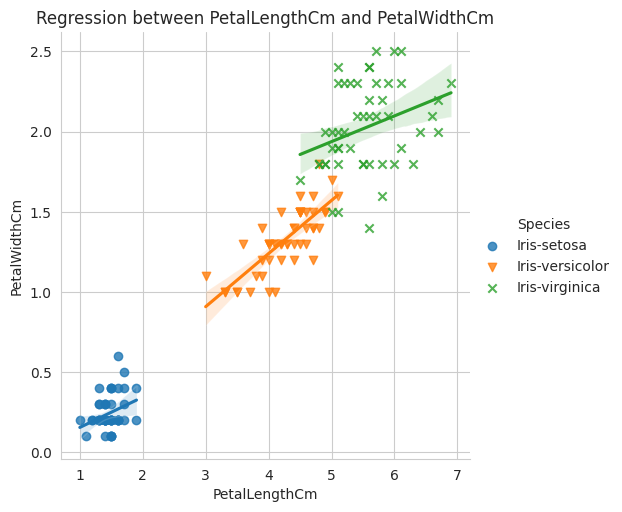

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(x='PetalLengthCm', y='PetalWidthCm', data=data, hue="Species", markers=['o', 'v', 'x'])
plt.title('Regression between PetalLengthCm and PetalWidthCm')

In [ ]:
data.corr() # correlation matrix

<ipython-input-13-ce1f18e464ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr() # correlation matrix


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<ipython-input-14-043f7550a638>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='Dark2_r', linewidths = 10)


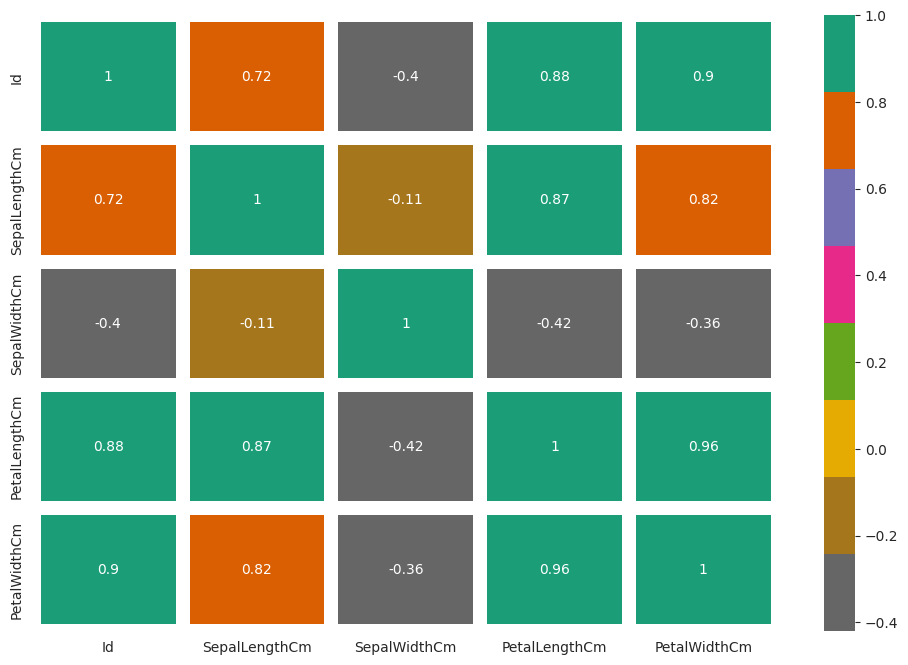

In [ ]:
plt.figure(figsize=(12,8)) 
# linewidths = 10 => distance or size of 'line' between square 
sns.heatmap(data.corr(), annot=True, cmap='Dark2_r', linewidths = 10)
plt.show()

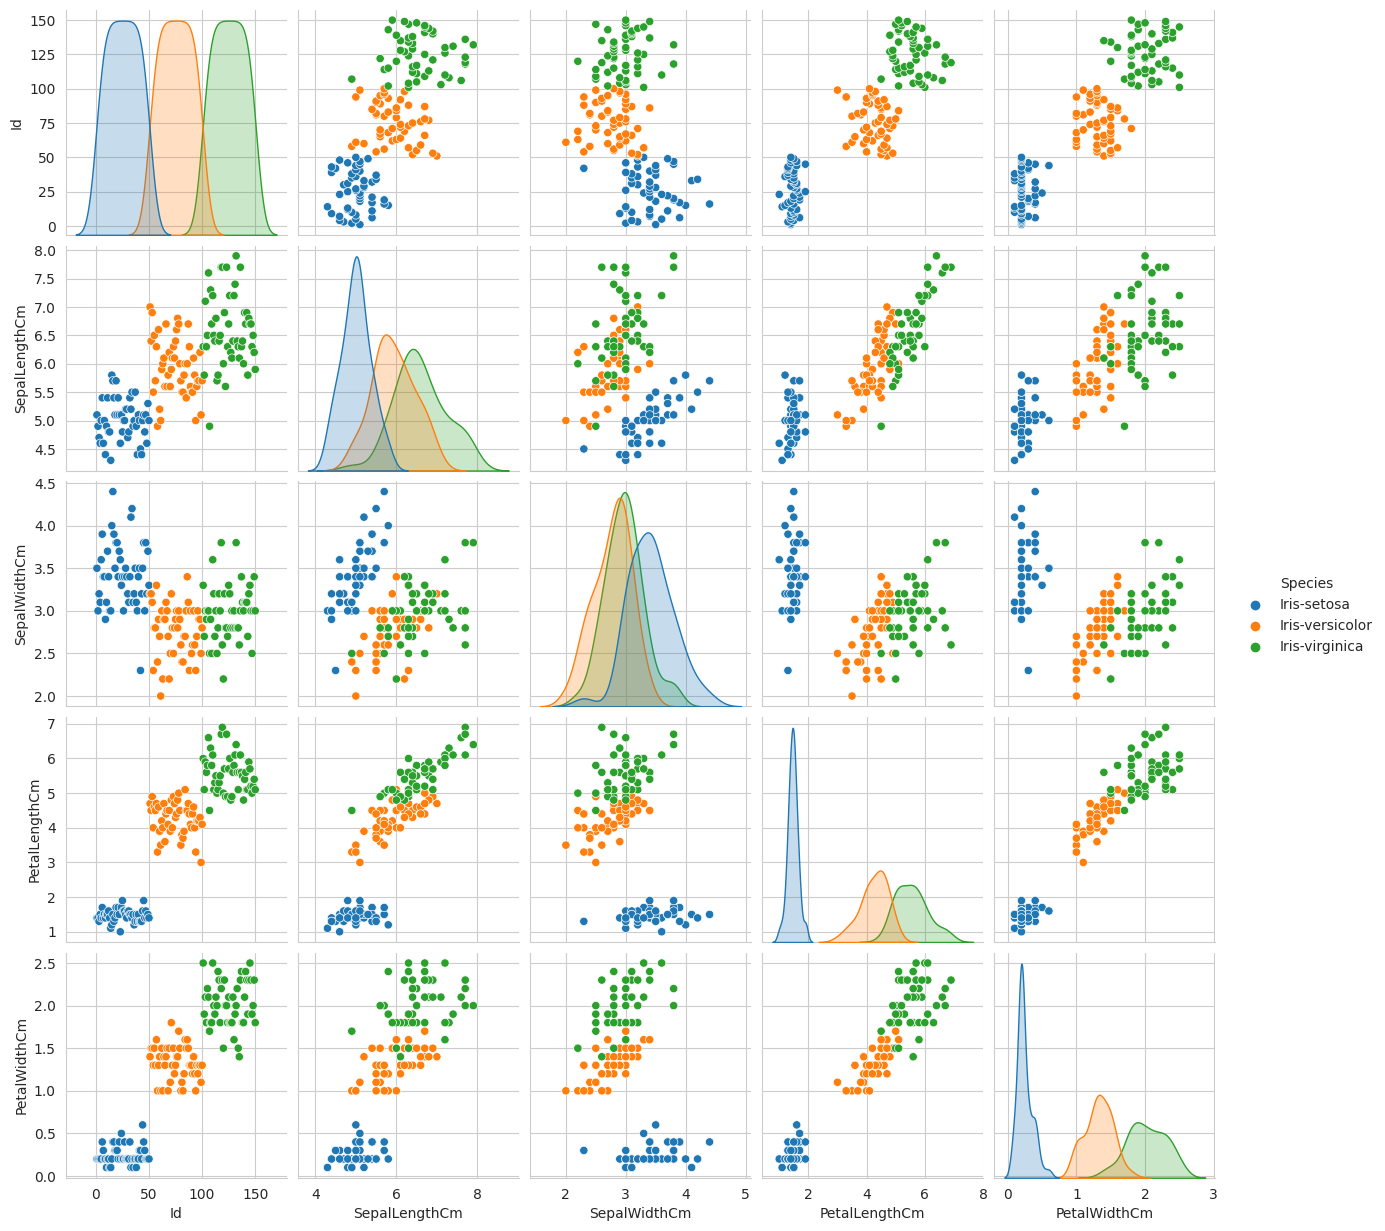

In [ ]:
sns.pairplot(data=data,hue='Species')

##3. Buid model:

##4. Fine-Tune:

##5. Use & monitor model:

In [ ]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [ ]:
#Model Selection
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [ ]:
data.drop(columns="Id",inplace=True)

In [ ]:
X = data.iloc[:, 0:4].values
y = data.iloc[:,4].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
# 0 : Iris-setosa
# 1 : Iris-versicolor
# 2 : Iris-virginica
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

Naive Bayes

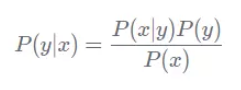 

[source](https://viblo.asia/p/phan-lop-voi-navie-bayes-classification-mo-hinh-va-ung-dung-WAyK8PRkKxX)

In [36]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
# accuracy_nb = round(accuracy_score(y_test, Y_pred)*100, 2)

cm = confusion_matrix(y_test, Y_pred)
# accuracy = accuracy_score(y_test, Y_pred)
# tp/(tp+fp) , average = 'micro' means calculating metrics globally 
# by counting the total true positives, false negatives and false positives
# of 3 classes. 
precision = precision_score(y_test, Y_pred, average='micro')
# tp(tp+fn)
recall = recall_score(y_test, Y_pred, average='micro')
# f1_score = 2*precision*recall/(precision+recall)
f1 = f1_score(y_test, Y_pred, average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 0.978
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


Decison Tree

Buiding decision tree using ID3 :

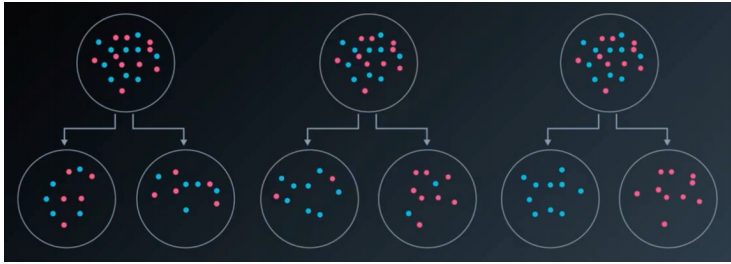

How to calculate entropy ?

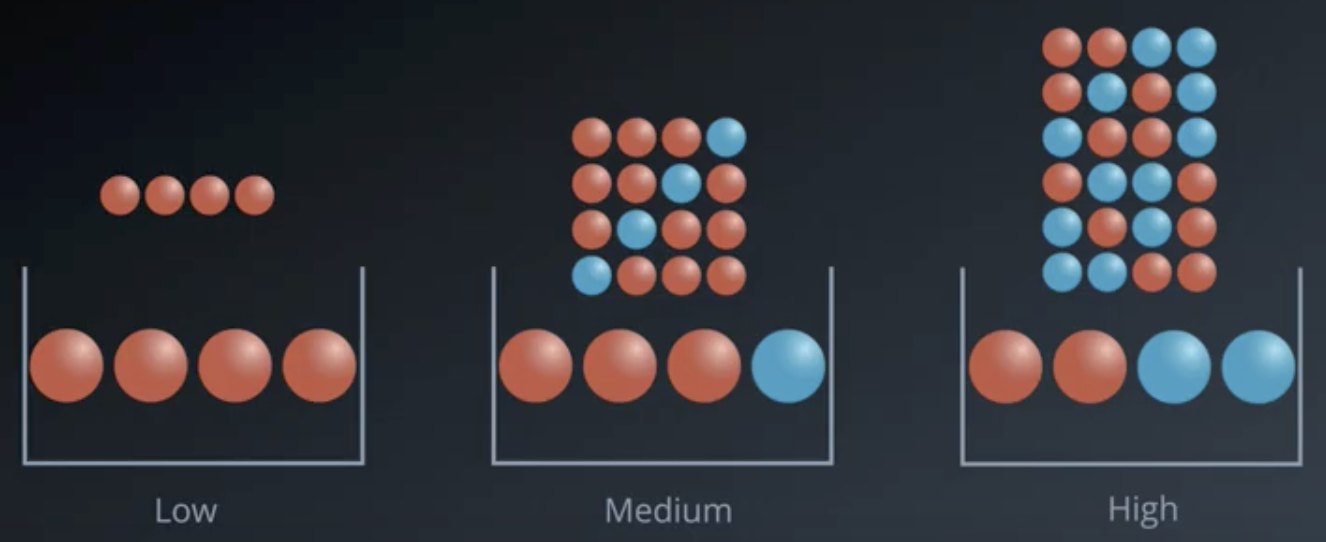

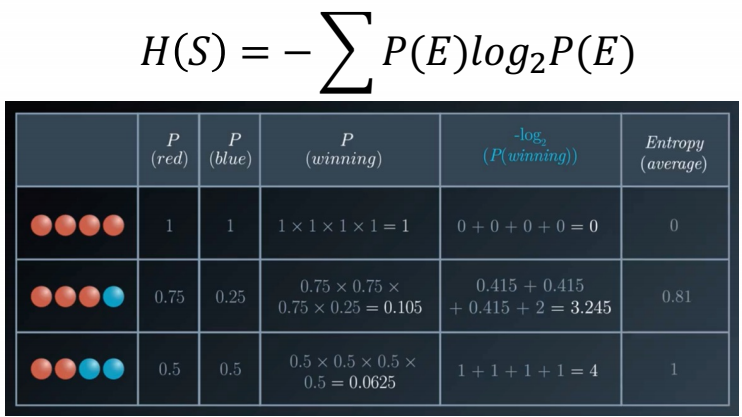

[ Source: from AI/ML/DL Course by Master Tuan Linh & TA ]

In [35]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
# acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1) 

Confusion matrix for DecisionTree
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_DecisionTree: 0.978
precision_DecisionTree: 0.978
recall_DecisionTree: 0.978
f1-score_DecisionTree : 0.978


In [ ]:
X_train

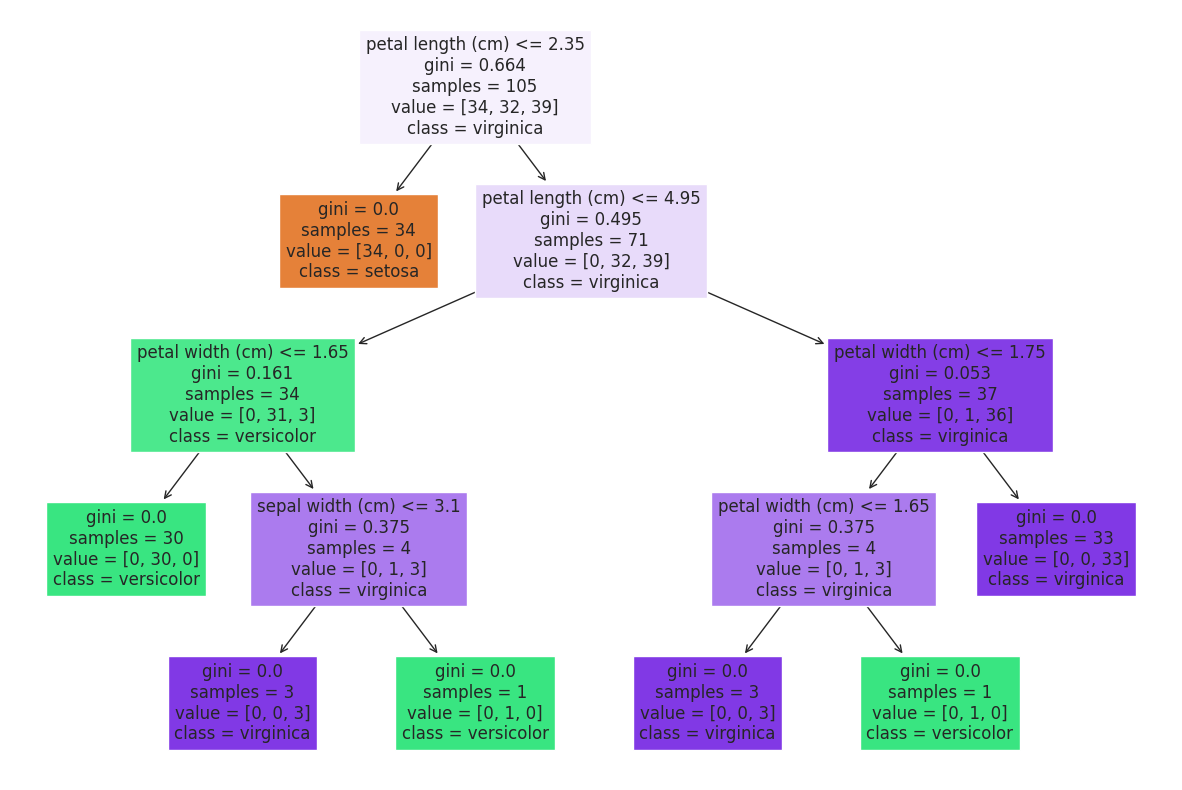

In [26]:
from sklearn.tree import plot_tree

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']

plt.figure(figsize = (15,10))
plot_tree(decision_tree.fit(X_train, y_train), 
          feature_names = fn, 
          class_names=cn,
          filled=True)
plt.show()
# X_train : SepalLengthCm	SepalWidthCm	PetalLengthCm	PetalWidthCm

Random Forest

In [34]:
# n_estimators : number of trees in the forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
# accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
# acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_prediction)
accuracy = accuracy_score(y_test,Y_prediction)
precision =precision_score(y_test, Y_prediction,average='micro')
recall =  recall_score(y_test, Y_prediction,average='micro')
f1 = f1_score(y_test,Y_prediction,average='micro')
print('Confusion matrix for Random Forest\n',cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)

Confusion matrix for Random Forest
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_random_Forest : 0.978
precision_random_Forest : 0.978
recall_random_Forest : 0.978
f1-score_random_Forest : 0.978


KNN

In [33]:
knn = KNeighborsClassifier(n_neighbors = 3) #chosing 3 nearest data point 
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test) 
# accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
# acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

Confusion matrix for KNN
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
accuracy_KNN : 0.978
precision_KNN : 0.978
recall_KNN: 0.978
f1-score_KNN : 0.978


<ipython-input-29-d7915fa5e6cb>:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()
<ipython-input-29-d7915fa5e6cb>:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(accuracy_score(y_test,prediction)))
<ipython-input-29-d7915fa5e6cb>:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(accuracy_score(y_test,prediction)))
<ipython-input-29-d7915fa5e6cb>:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(accuracy_score(y_test,prediction)))
<ipython-input-29-d7915fa5e6cb>:10: FutureWarning: The series.append method is deprecated and will be

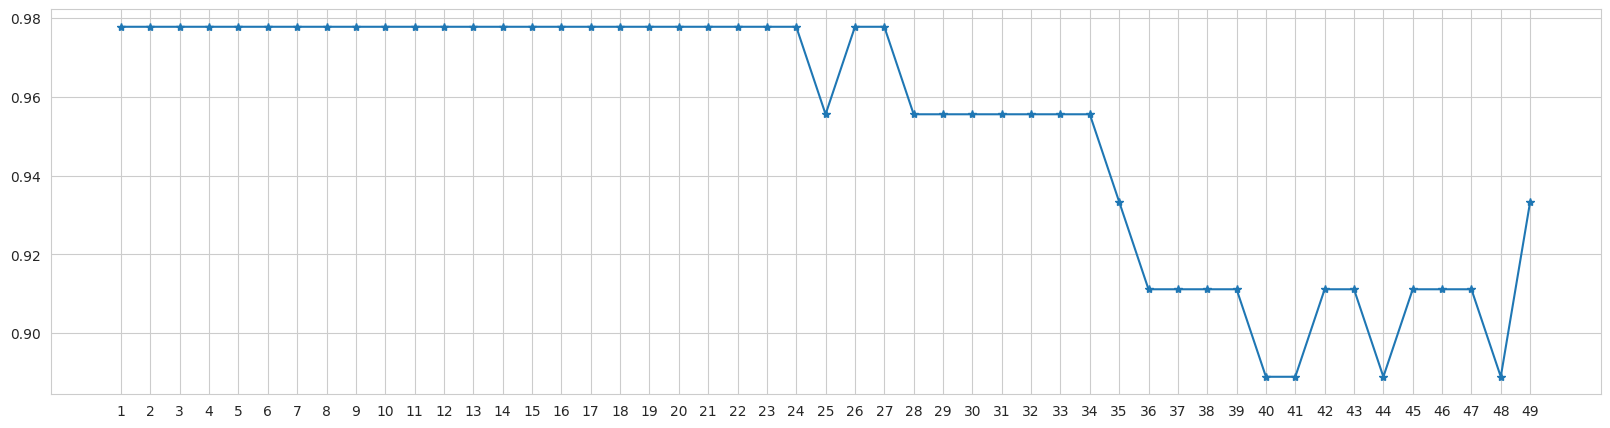

In [29]:
# vvisualization with different n_neighbor values
plt.subplots(figsize=(20,5))
a_index=list(range(1,50))
a=pd.Series()
x=range(1,50)
for i in list(range(1,50)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train, y_train) 
    prediction=model.predict(X_test)
    a=a.append(pd.Series(accuracy_score(y_test,prediction)))
plt.plot(a_index, a,marker="*")
plt.xticks(x)
plt.show()

Support Vector Machine

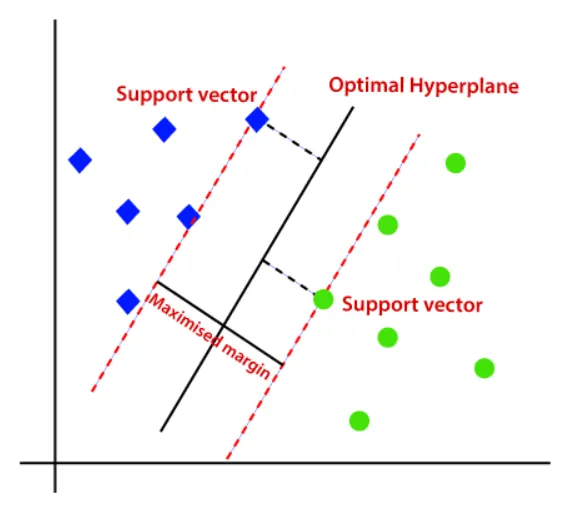

In [32]:
# max_iterint: The maximum number of iterations to be run.
linear_svc = LinearSVC(max_iter=4000)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
# accuracy_svc=round(accuracy_score(y_test,Y_pred)* 100, 2)
# acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.3f' %accuracy)
print('precision_SVC: %.3f' %precision)
print('recall_SVC: %.3f' %recall)
print('f1-score_SVC : %.3f' %f1)

Confusion matrix for SVC
 [[16  0  0]
 [ 0 15  3]
 [ 0  0 11]]
accuracy_SVC: 0.933
precision_SVC: 0.933
recall_SVC: 0.933
f1-score_SVC : 0.933
